# Tarea 11 Termodinámica

## [1]. Paramagneto de Langevin

In [1]:
function newton1(f ::Function, df ::Function, x0::Float64)
    i = 0
    while i < 100 && abs(f(x0)) > 1e-15
        i += 1
        x0 -= f(x0)/df(x0)
    end
    return x0
end

newton1 (generic function with 1 method)

In [2]:
k = 1/2

0.5

In [3]:
dL(x) = csch(x)^2 + 1/(x^2)

dL (generic function with 1 method)

In [4]:
L(x) = coth(x) - 1/x - k

L (generic function with 1 method)

In [5]:
@time newton1(L, dL, 1.0)

  0.024099 seconds (7.97 k allocations: 351.584 KB)


1.7967559847237082

### Aproximando en Taylor a 2do órden

In [6]:
f(x) = (1/3)*x - (1/45)x^3 + (2/945)x^5 - k

f (generic function with 1 method)

In [7]:
df(x) = 1/3 - (3/45)x^2 + (10/945)x^4

df (generic function with 1 method)

In [8]:
newton1(f,df,1.0)

1.754497356368674

In [9]:
using Plots
pyplot()

Plots.PyPlotBackend()


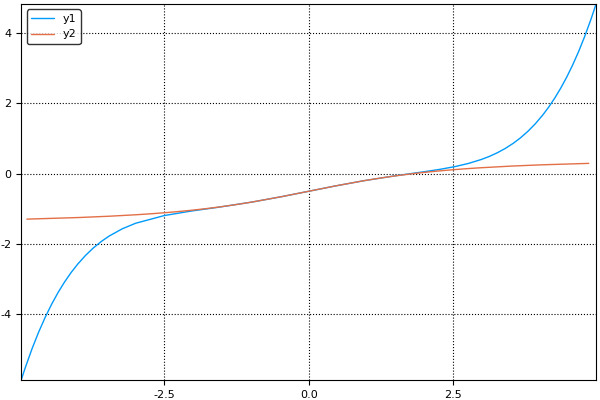

In [10]:
plot(f)
plot!(L)


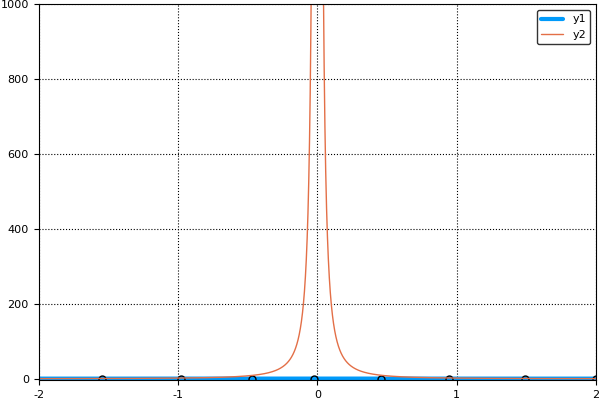

In [11]:
plot(df, xlims = (-2,2), ylims=(-3,1000), marker=5, linewidth=3)
plot!(-2:0.0007:2,dL)

### con 1/x

In [12]:
L2(x) = coth(1/x) - x - k
dL2(x) = (csch(1/x)^2)/x^2 -1
k = 1/2
f2(x) = 1/3x - 1/(45x^3) + 2/(945x^5) - k
df2(x) = -1/(3x^2) + 3/(45x^4) - 10/(945x^6)

df2 (generic function with 1 method)

In [13]:
function newton1(f ::Function, df ::Function, x0::Float64)
    i = 0
    while i < 100 && abs(f(x0)) > 1e-15
        i += 1
        x0 -= f(x0)/df(x0)
    end
    return x0
end

newton1 (generic function with 1 method)

In [14]:
using Plots; pyplot()

Plots.PyPlotBackend()

In [15]:
@show newton1(L2,dL2, 1.0)

newton1(L2,dL2,1.0) = 0.5565586025604752


0.5565586025604752

In [16]:
newton1(f2,df2,1.0)

0.5699638112135573


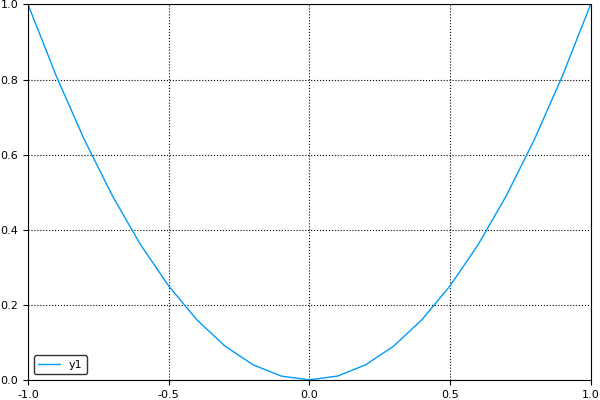

In [17]:
plot(-1:0.1:1,x->x^2)


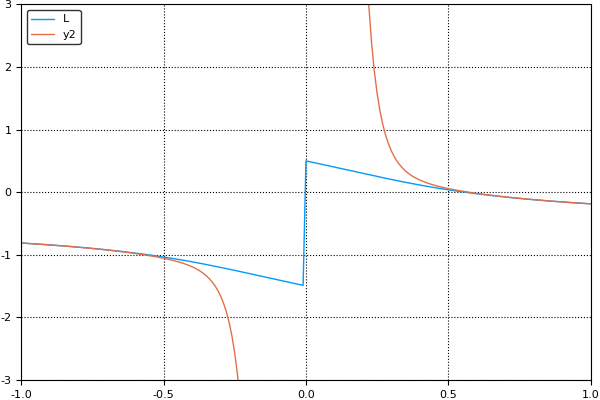

In [18]:
plot(-1.0:0.01:1.0, L2, label="L", xlims=(-1,1))
#scatter([newton1(L2,dL2, 1.0),0])
plot!(-1.0:0.01:1.0,f2, ylims=(-3,3))


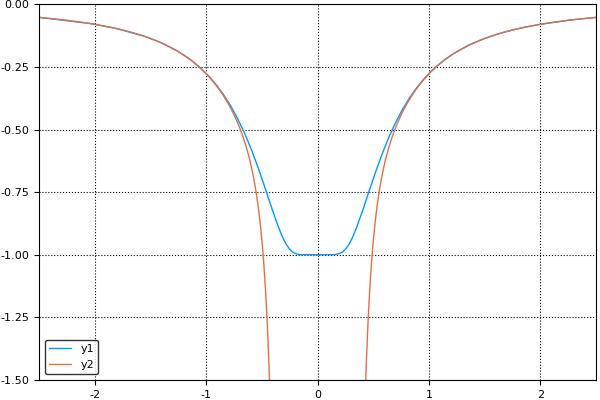

In [19]:
plot(dL2, xlims=(-2.5,2.5), ylims=(-1.5,0.))
plot!(-2.5:0.0017:2.5,df2)

## [2] Gas de Van der Wals

In [20]:
dF_x(x,y) = 3x^2

dF_x (generic function with 1 method)

In [21]:
dF_y(x,y) = 2y

dF_y (generic function with 1 method)

In [22]:
F(x,y) = x^3 + y^2 - 6
G(x,y) = 2x + y - 1
#H(x,y) = []

G (generic function with 1 method)

In [23]:
function der_x(f::Function, x, y, h = 1e-3) #primera parcial centrada
    df_x = (f(x + h/2,y) - f(x - h/2,y)) / h
end

der_x (generic function with 2 methods)

In [24]:
function der_y(f::Function, x, y, h = 1e-3) #primera parcial centrada
    df_y = (f(x,y + h/2) - f(x,y - h/2)) / h
end

der_y (generic function with 2 methods)

In [25]:
@show der_x(F, 1.0, 2.0)
der_y(F, 1.0, 2.0)

der_x(F,1.0,2.0) = 3.0000002500001344


4.000000000000448

In [26]:
@show dF_y(1,2)
dF_x(1,2)

dF_y(1,2) = 4


3

In [27]:
function jacobian(f, g, x, y, h = 1e-3)
    J = zeros(2,2)
    J[1,1] = der_x(f, x, y, h)
    J[1,2] = der_y(f, x, y, h)
    J[2,1] = der_x(g, x, y, h)
    J[2,2] = der_y(g, x, y, h)
    return J
end

jacobian (generic function with 2 methods)

In [28]:
jacobian(F,G,1.0,1.0)

2×2 Array{Float64,2}:
 3.0  2.0
 2.0  1.0

In [29]:
inv(jacobian(F,G,1.0,1.0))

2×2 Array{Float64,2}:
 -1.0   2.0
  2.0  -3.0

In [30]:
inv(jacobian(F,G,1.0,1.0))*[F(1,2),G(1,2)]

2-element Array{Float64,1}:
   7.0
 -11.0

In [31]:
function newton_dos_ecs(f1, f2, x0, y0, h = 1e-3, tol = 1e-12)
    i = 1
    #F = [f1,f2]
    xy = zeros(2,1)
    xy[1], xy[2] = x0, y0 
    while abs(f1(xy[1],xy[2])) > tol || abs(f2(xy[1],xy[2])) > tol  
        i += 1
        xy -= inv(jacobian(f1, f2, xy[1], xy[2]))*[f1(xy[1],xy[2]),f2(xy[1],xy[2])]
        @show xy
        if i > 100
            error("Número máximo de iteraciones alcanzado.")
        end
    end
    return xy
end

newton_dos_ecs (generic function with 3 methods)

In [32]:
@show F(1.401222304826,-1.80244460965372)
@show G(1.40122,-1.80244);

F(1.401222304826,-1.80244460965372) = -5.041300710217911e-12
G(1.40122,-1.80244) = -2.220446049250313e-16


In [33]:
newton_dos_ecs(F,G,100,100)

xy = [67.8989; -134.798]
xy = [44.8511; -88.7022]
xy = [29.5005; -58.0009]
xy = [19.2882; -37.5765]
xy = [12.5117; -24.0234]
xy = [8.03999; -15.08]
xy = [5.12499; -9.24998]
xy = [3.27543; -5.55086]
xy = [2.17314; -3.34627]
xy = [1.61202; -2.22404]
xy = [1.42418; -1.84837]
xy = [1.40155; -1.80309]
xy = [1.40122; -1.80244]
xy = [1.40122; -1.80244]


2×1 Array{Float64,2}:
  1.40122
 -1.80244

In [34]:
newton_dos_ecs(F,G,100,100)[2]

xy = [67.8989; -134.798]
xy = [44.8511; -88.7022]
xy = [29.5005; -58.0009]
xy = [19.2882; -37.5765]
xy = [12.5117; -24.0234]
xy = [8.03999; -15.08]
xy = [5.12499; -9.24998]
xy = [3.27543; -5.55086]
xy = [2.17314; -3.34627]
xy = [1.61202; -2.22404]
xy = [1.42418; -1.84837]
xy = [1.40155; -1.80309]
xy = [1.40122; -1.80244]
xy = [1.40122; -1.80244]


-1.802444609653724

In [40]:
T = 100
A(ρ_liq, ρ_vap) = (1/(ρ_liq + ρ_vap))*(ρ_liq/(3 - ρ_liq) - ρ_vap/(3 - ρ_vap)) - (3/8T)*(ρ_liq - ρ_vap)
B(ρ_liq, ρ_vap) = log((ρ_liq*(3 - ρ_vap))/(ρ_vap*(3 - ρ_liq)))  - ((ρ_liq - ρ_vap)/(ρ_liq + ρ_vap))*(1/(3 - ρ_liq) + 1/(3 - ρ_vap))

B (generic function with 1 method)

In [45]:
newton_dos_ecs(A,B,10.,20.)

xy = [13.3466; 13.4002]
xy = [13.3734; 13.3734]
xy = [13.3734; 13.3734]


2×1 Array{Float64,2}:
 13.3734
 13.3734

In [43]:
A(newton_dos_ecs(A,B,1.,2.)[1],newton_dos_ecs(A,B,1.,2.)[2])

xy = [1.77269; 1.78641]
xy = [1.77964; 1.77963]
xy = [1.77963; 1.77963]
xy = [1.77269; 1.78641]
xy = [1.77964; 1.77963]
xy = [1.77963; 1.77963]


-7.43622472754464e-16

In [46]:
B(13.3734,13.3734)

0.0